# Pràctica 1:

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar models de regressió, ficant l'èmfasi en: 
    1. Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant
    4. Saber aplicar el procès de descens del gradient
    
## Avaluació

* apartat C. serà obligatori per aprovar la pràctica 1 (amb un 5.0)
* apartat B. serà opcional i val fins a 3 punts (cal haver fet el apartat C).
* apartat A. serà opcional i val fins a 2 punts (cal haver fet el apartat C i B).

## Material de la pràctica 1

1. Base de dades a Kaggle: https://www.kaggle.com/sabermalek/tapds 
2. Codi d'exemple ('Practica1-Regressio2021.ipynb').
3. Apunts de l'assignatura.
4. Llibreries de python: scikit-learn, numpy, scipy, matplotlib.

## Dataset: Tabriz Air Pollution
<div>
    <img src=images/Tabriz.png width="500">
</div>


Tabriz is the capital city of East Azerbaijan Province, in northwestern Iran. 


# Apartat (C): Analitzant Dades

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

In [2]:
rahan_csv = pd.read_csv('dataset/Rahan.csv', delimiter=';')
rahan_csv = rahan_csv.iloc[:,:-2]
rahan_csv

,Time,air_temperature,dewpoint,wind_direction,wind_speed,ambient_pressure,PM10,PM2.5
0,02/19/2017 11:00,-5.42,-13.11,175.38,0.82,"873,97",5.36,1.41
1,02/19/2017 12:00,-5.22,-12.25,185.49,1.52,"873,12",5.30,1.51
2,02/19/2017 13:00,-4.68,-11.39,189.92,1.39,"872,14",4.39,1.69
3,02/19/2017 14:00,-4.10,-10.69,200.58,1.53,"871,56",3.94,1.58
4,02/19/2017 15:00,-3.57,-10.70,191.31,1.50,"871,13",3.44,1.50
...,...,...,...,...,...,...,...,...
16388,01/13/2019 07:00,-1.07,-8.77,10.51,1.37,NaN,26.27,12.67
16389,01/13/2019 08:00,-0.72,-8.78,359.97,1.23,NaN,27.69,12.57
16390,01/13/2019 09:00,0.03,-8.80,10.03,0.72,NaN,29.73,13.39
16391,01/13/2019 10:00,1.94,-9.04,3.44,1.35,NaN,29.92,13.14


In [3]:
abrasan_csv = pd.read_csv('dataset/TabrizPollution/Abrasan.csv', delimiter=';')
abrasan_csv

,Time,air_temperature,dewpoint,wind_direction_corr,wind_speed,relative_pressure,PM10,PM2.5
0,02/19/2017 10:30,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,77.96,46.47
1,02/19/2017 11:00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,15.22,14.62
2,02/19/2017 11:30,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,8.68,8.35
3,02/19/2017 12:00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,6.92,6.70
4,02/19/2017 12:30,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.89,5.72
...,...,...,...,...,...,...,...,...
16589,01/13/2019 07:00,-2.30,-10.80,28.57,0.61,853.20,-9999.00,-9999.00
16590,01/13/2019 08:00,-1.92,-10.66,29.24,0.50,853.18,-9999.00,-9999.00
16591,01/13/2019 09:00,-1.17,-10.25,25.83,0.67,853.22,-9999.00,-9999.00
16592,01/13/2019 10:00,0.63,-10.34,26.62,0.66,852.88,-9999.00,-9999.00


In [4]:
bashumal_csv = pd.read_csv('dataset/TabrizPollution/Bashumal.csv', delimiter=';')
bashumal_csv

,Time,air_temperature,dewpoint,wind_direction_corr,wind_speed,relative_pressure,PM10,PM2.5
0,02/20/2017 16:00,-3.09,-11.38,159.43,0.63,865.16,117.46,70.98
1,02/20/2017 16:30,-3.55,-11.83,153.12,0.66,865.37,103.74,62.23
2,02/20/2017 17:00,-3.91,-11.82,146.41,0.76,865.58,98.36,61.13
3,02/20/2017 17:30,-4.29,-11.83,146.60,0.57,865.61,110.39,68.60
4,02/20/2017 18:00,-4.68,-11.79,155.82,0.52,865.53,116.16,73.85
...,...,...,...,...,...,...,...,...
15895,01/13/2019 07:00,-1.76,-10.32,211.63,0.06,856.24,26.23,18.02
15896,01/13/2019 08:00,-1.40,-10.32,242.19,0.03,856.24,76.50,25.94
15897,01/13/2019 09:00,-0.72,-9.91,99.04,0.02,856.30,43.97,23.03
15898,01/13/2019 10:00,0.78,-9.97,175.93,0.09,855.97,42.24,24.54


In [5]:
rastakucha_csv = pd.read_csv('dataset/TabrizPollution/RastaKucha.csv', delimiter=';')
rastakucha_csv

,Time,air_temperature,dewpoint,wind_direction_corr,wind_speed,relative_pressure,PM10,PM2.5
0,02/21/2017 16:00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
1,02/21/2017 16:30,-2.21,-7.48,348.55,0.34,861.30,38.29,36.22
2,02/21/2017 17:00,-2.19,-7.38,4.20,0.44,861.45,38.97,37.52
3,02/21/2017 17:30,-2.44,-7.74,356.88,0.35,861.48,-9999.00,-9999.00
4,02/21/2017 18:00,-2.53,-7.78,24.99,0.13,861.31,-9999.00,-9999.00
...,...,...,...,...,...,...,...,...
16463,01/13/2019 06:00,-1.69,-10.26,113.89,0.44,858.13,41.42,32.55
16464,01/13/2019 07:00,-1.35,-10.62,153.70,0.53,857.90,41.56,27.67
16465,01/13/2019 08:00,-1.05,-10.45,113.83,0.18,857.91,49.78,31.70
16466,01/13/2019 09:00,-0.46,-10.02,84.53,0.22,857.96,53.08,35.07


In [6]:
#data = pd.concat([rahan_csv, abrasan_csv, bashumal_csv, rastakucha_csv])
#data

In [7]:
data = pd.concat([abrasan_csv, bashumal_csv, rastakucha_csv], ignore_index=True)
data

,Time,air_temperature,dewpoint,wind_direction_corr,wind_speed,relative_pressure,PM10,PM2.5
0,02/19/2017 10:30,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,77.96,46.47
1,02/19/2017 11:00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,15.22,14.62
2,02/19/2017 11:30,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,8.68,8.35
3,02/19/2017 12:00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,6.92,6.70
4,02/19/2017 12:30,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.89,5.72
...,...,...,...,...,...,...,...,...
48957,01/13/2019 06:00,-1.69,-10.26,113.89,0.44,858.13,41.42,32.55
48958,01/13/2019 07:00,-1.35,-10.62,153.70,0.53,857.90,41.56,27.67
48959,01/13/2019 08:00,-1.05,-10.45,113.83,0.18,857.91,49.78,31.70
48960,01/13/2019 09:00,-0.46,-10.02,84.53,0.22,857.96,53.08,35.07


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48962 entries, 0 to 48961
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 48962 non-null  object 
 1   air_temperature      48962 non-null  float64
 2   dewpoint             48962 non-null  float64
 3   wind_direction_corr  48962 non-null  float64
 4   wind_speed           48962 non-null  float64
 5   relative_pressure    48962 non-null  float64
 6   PM10                 48962 non-null  float64
 7   PM2.5                48962 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.0+ MB


In [9]:
data.describe()

,air_temperature,dewpoint,wind_direction_corr,wind_speed,relative_pressure,PM10,PM2.5
count,48962.000000,48962.000000,48962.000000,48962.000000,48962.000000,48962.000000,48962.000000
mean,-48.641823,-62.397421,56.498420,-63.514204,789.289590,-1057.925704,-1089.109561
std,800.761921,798.333925,822.654039,798.226238,866.753414,3157.658804,3146.215129
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,7.510000,-2.270000,35.270000,0.190000,855.590000,20.510000,9.540000
50%,15.070000,1.580000,100.895000,0.410000,858.800000,40.025000,15.020000
75%,23.410000,5.840000,173.417500,0.820000,862.070000,65.180000,24.540000
max,41.180000,15.290000,359.990000,4.780000,875.230000,1999.230000,253.220000


In [10]:
df = data[(data['air_temperature'] != -9999.0) & (data['dewpoint'] != -9999.0) & (data['wind_direction_corr'] != -9999.0) & 
            (data['wind_speed'] != -9999.0) & (data['relative_pressure'] != -9999.0) & (data['PM10'] != -9999.0) & 
            (data['PM2.5'] != -9999.0)]
df.describe()

,air_temperature,dewpoint,wind_direction_corr,wind_speed,relative_pressure,PM10,PM2.5
count,43281.000000,43281.000000,43281.000000,43281.000000,43281.000000,43281.000000,43281.000000
mean,15.695477,1.584309,130.297285,0.570703,859.118807,56.865056,21.688543
std,9.850558,5.378677,97.953231,0.549497,4.591242,58.128905,17.281986
min,-10.080000,-25.740000,0.000000,0.000000,842.350000,0.000000,0.000000
25%,7.640000,-2.370000,37.980000,0.190000,855.880000,27.330000,11.370000
50%,15.010000,1.460000,114.380000,0.400000,858.970000,44.500000,16.490000
75%,23.310000,5.700000,178.160000,0.770000,862.300000,69.220000,26.240000
max,41.180000,15.290000,359.990000,4.780000,875.230000,1999.230000,253.220000


In [11]:
#df[df.index.duplicated()]
#df = df[~df.index.duplicated()]

<Figure size 432x288 with 0 Axes>

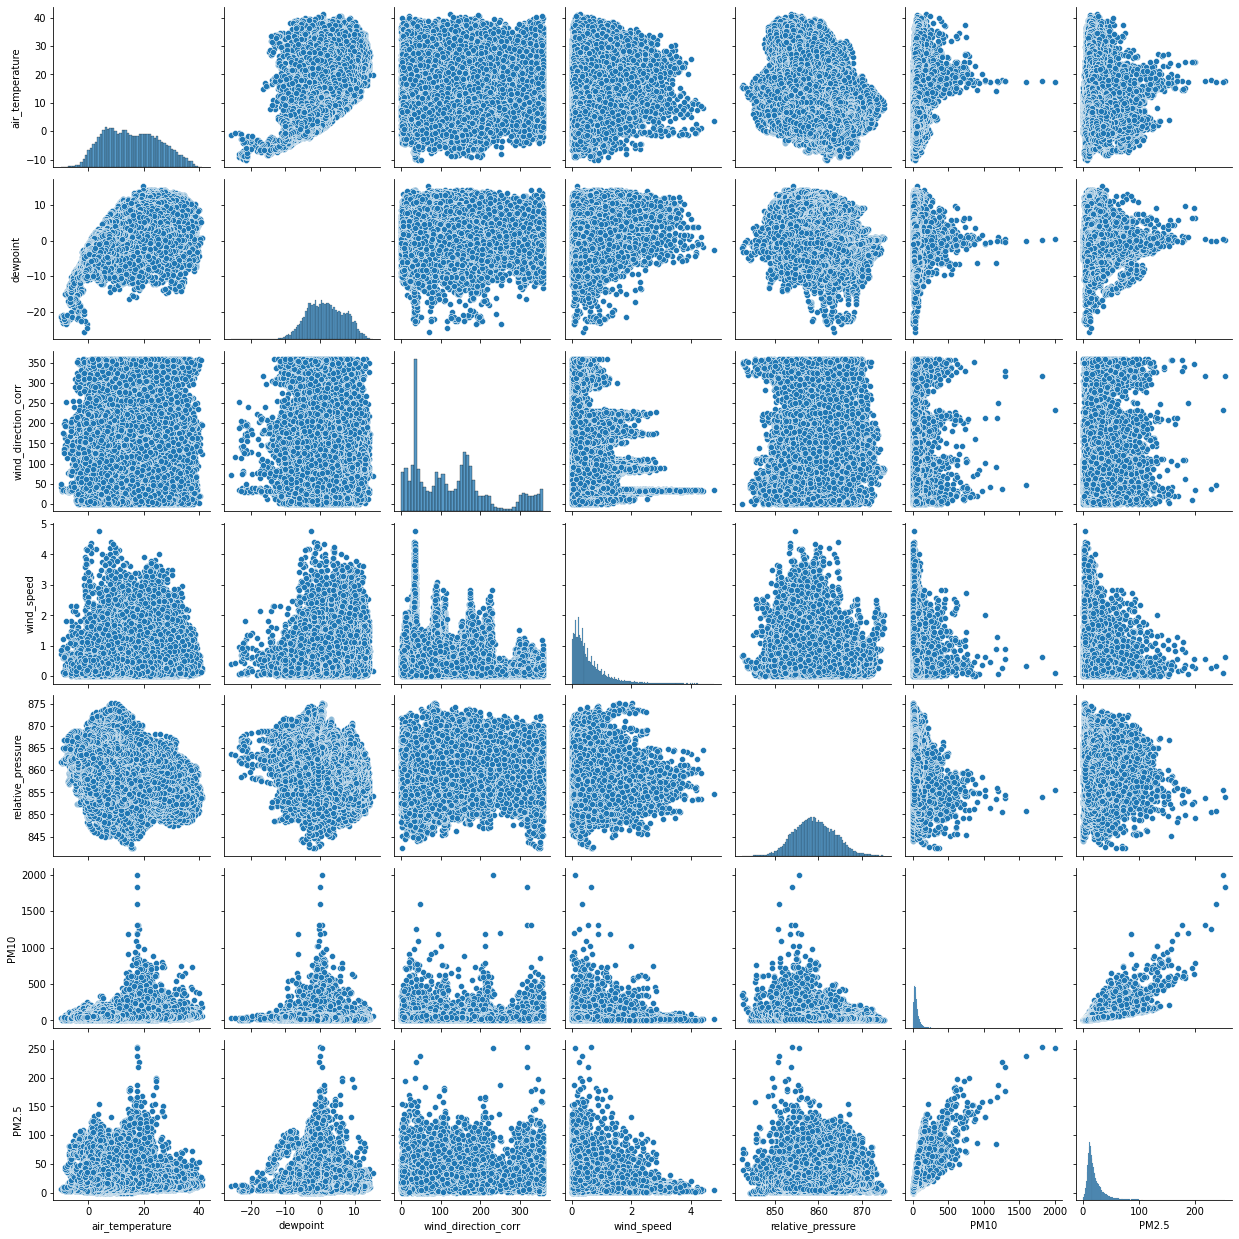

<Figure size 432x288 with 0 Axes>

In [16]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df)
plt.figure()